# AI Training
## Se trabajan con 1 base de datos

estas bases de datos la base de datos convertida llamada **merged_dataset.csv**, que se obtiene corriendo el codigo del archivo **Unify_dataset.ipynb**

los sentimientos usados son
| sadness | joy/happ | love | anger | fear | surprise | neutral |
|---------|-----|------|-------|-----|------|-------|
| 0      | 1  | 2   | 3   |  4  | 5    | 6     | 


In [51]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from joblib import dump


In [52]:
df=pd.read_csv('ModelosCSV/merged_dataset_seven_sentiments.csv')
df

,text,label
0,i just feel really helpless and heavy hearted,4.0
1,ive enjoyed being able to slouch about relax a...,0.0
2,i gave up my internship with the dmrg and am f...,4.0
3,i dont know i feel so lost,0.0
4,i am a kindergarten teacher and i am thoroughl...,4.0
...,...,...
1034185,"his fighting skills were legendary, making him...",NaN
1034186,the news of his tragic death left the communit...,NaN
1034187,their marriage was a celebration of love and u...,NaN
1034188,"he embarked on a thrilling travel adventure, e...",NaN


In [53]:
df = df.dropna()
df.isnull().sum()

text     0
label    0
dtype: int64

In [54]:
df_train, df_test = train_test_split(df , test_size=0.2 , random_state=50)

In [55]:
df_train

,text,label
1027993,Tech hobbyist scifi fan (me): That fridge is g...,3.0
329637,i just feel ashamed about everything that i am,0.0
231494,i didn t feel anything though which was also s...,4.0
86900,i am happy but at the same time feeling sentim...,0.0
486699,Maybe they were just attracted to each other b...,7.0
...,...,...
441633,"Fine , thanks .",7.0
677997,i get this really disturbing feeling that make...,0.0
239499,i know i probably shouldnt write with that sor...,4.0
103904,i have been feeling a little insecure to share...,4.0


In [56]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_train

<826954x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 10637162 stored elements in Compressed Sparse Row format>

In [57]:
X_test = vectorizer.transform(df_test['text'])
X_test

<206739x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2658725 stored elements in Compressed Sparse Row format>

In [58]:
Y_train = df_train['label']
Y_test = df_test['label']

X_train


<826954x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 10637162 stored elements in Compressed Sparse Row format>

In [59]:
model = LogisticRegression(max_iter=1500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train acc: 0.8746508270109341
Test acc: 0.8710257861361427


In [60]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
P_train

array([7., 0., 5., ..., 0., 4., 1.])

In [61]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[9.22489430e-01, 2.06139221e-02, 3.28832720e-03, 2.06189733e-02,
        1.48454587e-02, 1.49010219e-03, 5.05119385e-05, 1.66032742e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21724193e-02, 8.97738527e-01, 3.36200413e-02, 5.08759457e-03,
        4.71773713e-03, 5.91360952e-03, 6.16429068e-05, 4.06884280e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20631930e-02, 1.83118260e-01, 7.65852920e-01, 6.02318421e-03,
        3.09571479e-03, 1.78340091e-03, 0.00000000e+00, 2.80633276e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.52974204e-02, 2.85831319e-02, 3.62659100e-03, 8.37113114e-01,
        2.36577617e-02, 1.66843167e-03, 4.39586788e-04, 5.96139629e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.47476059e-02, 2.65864949e-02, 2.90234882e-03, 3.15217125e-02,
        8.25307992e-01, 3.40199368e-02, 4.00450660e-03, 3.09

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,  1.,  1.,
         2.,  2.,  1.,  1.,  3.,  0.,  2.,  3.,  2.,  0.,  1.,  3.,  3.,
         4.,  4.,  1.,  7.,  0.,  4.,  1.,  3.,  3.,  5.,  6.,  7.,  3.,
         6.,  3., 12.,  3.,  8.,  3.,  7.,  9.,  5.,  7.,  1.,  8.,  7.,
         7.,  4.,  6.,  2.,  6.,  7.,  1.,  5.,  2.,  2.,  3.,  2.,  2.,
         4.,  3.,  1.,  0.,  3.,  1.,  1.,  1.,  0.,  1.,  3.,  3.,  0.,
         2.,  1.,  2.,  4.,  4.,  4.,  4.,  6.,  5., 13.,  9., 15., 18.,
        23., 25., 41., 31., 49., 49., 66., 62., 66., 94., 68., 92., 74.,
        88., 77., 71., 80., 87., 64., 58., 38., 44., 34., 32., 18., 20.,
        16., 14., 14., 13.,  7.,  7.,  4.,  2.,  5.,  4.,  6.,  2.,  2.,
         4.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  2.,  2.,  0.,  0.

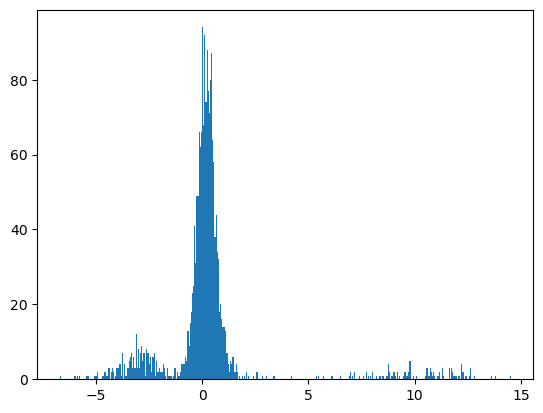

In [62]:
plt.hist(model.coef_[0], bins=400)

In [63]:
mi_oracion = "this text i so complicated  im impacient"
mi_oracion_vectorizada = vectorizer.transform([mi_oracion])
sentimiento_predicho = model.predict(mi_oracion_vectorizada)
print("Sentimiento predicho para la oración:", sentimiento_predicho)
dump(model, 'ModelosCSV/modelo_AI.pkl')

Sentimiento predicho para la oración: [3.]


['ModelosCSV/modelo_AI.pkl']